# This is prject 3 of Data Analyst Nanodegree "Part 1"
## Exploratory Data Analysis "Communicatie Data Findings"
### done entirely by Rimas Alshehri

Project Rubric part 1: Is the data explored systematically using a series of appropriate and varied visualizations?

# Questions:
those will be answered at the end of the notebook
----------------------
## Univariate Exploration:
* Are the creditGrades distributed equally? if not what do you Observe?
* what is the most percent of funding?
* Can you drive any observation about the Investors? If so what is it?

---------------------------
## Bivarite Exploration:
* How does CreditGrade affect the PercentFunded?
* Does the Term of a listing correlate with the number of Investors?
* Is there a relationship between Recommendations and PercentFunded?
* What is the relationship between InvestmentFromFriendsAmount and InvestmentFromFriendsCount?
* what is the impact of Recommendations on Funding Success
* How does the term length of a loan relate to the credit grade in terms of the average percent funded for each combination?
------------------------------
## Multivariate Exploration:
* How does the relationship between the number of investors and the percent funded vary across different CreditGrades and loan terms?
* What is the relationship among percent funded, number of investors, and recommendations for listings?
* Does the credit grade and term of a listing influence its funding success, as measured by the percent funded and the number of investors attracted?



# i will first discover and understand my data

In [44]:
# first i import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

In [45]:
#now i will put my dataset in a dataframe to make it easier for me to handle it
df=pd.read_csv('/kaggle/input/prosperloandata/prosperLoanData.csv')
#now i want to display it
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


# now i will perform some operations to understand more

In [46]:
#i will check the size of my data
df.shape

(113937, 81)

In [47]:
#i will check the summary statistics to see if i have bias in values
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [48]:
# i check datatypes
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [49]:
#i will check for null values
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

^ i can tell that CreditGrade has much null values

In [50]:
mode_value = df['CreditGrade'].mode()[0]  # [0] selects the mode value if there are multiple modes

# Fill null values in the CreditGrade column with the mode
df['CreditGrade'] = df['CreditGrade'].fillna(mode_value)

# Verify if null values are filled
print(df['CreditGrade'].isnull().sum())

0


now i will recheck for nulls

In [51]:
df.isnull().sum()

ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
CreditGrade                    0
Term                           0
                              ..
PercentFunded                  0
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
Length: 81, dtype: int64

In [52]:
#i will check the correlation in my data
corr=df.corr
corr

<bound method DataFrame.corr of                      ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000

### now i will start with 
## Univariate Exploration
### The goal here is to understand the distribution, frequency, and characteristics of each variable independently.

* Histogram - required
* Bar Chart
* Count Plot

## Q: Are the creditGrades distributed equally? if not what do you Observe

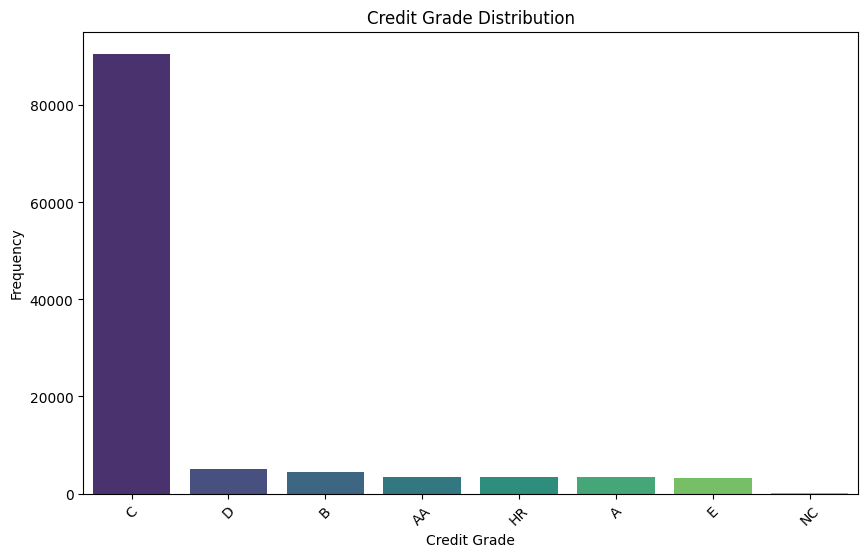

In [53]:
# Categorical Variable: CreditGrade and its frequency
credit_grade_counts = df['CreditGrade'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=credit_grade_counts.index, y=credit_grade_counts.values, palette='viridis')
plt.title('Credit Grade Distribution')
plt.xlabel('Credit Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### A: Observation:
### i can tell from the visualization that CreditGrades are not equally distributed yet i can see a nvery noticeable bias towards a certain class  ,where CreditGrade C is the highest amongst other CreditGrades

Histogram for PercentFunded

## Q: what is the most percent of funding?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


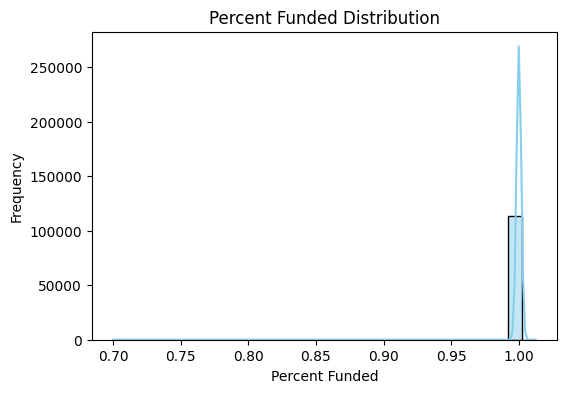

In [54]:
plt.figure(figsize=(6, 4))
sns.histplot(df['PercentFunded'], bins=30, kde=True, color='skyblue')
plt.title('Percent Funded Distribution')
plt.xlabel('Percent Funded')
plt.ylabel('Frequency')
plt.show()

## A: funding percentage reached 100% with a high number of benefeciaries

## Histogram for Investors
# ## Q: Can you drive any observation about the Investors? If so what is it?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


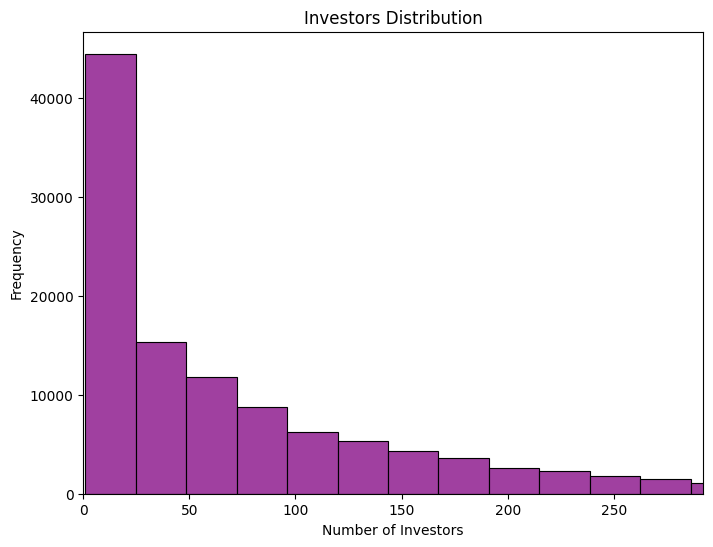

In [55]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Investors'], bins=50, color='purple')
plt.title('Investors Distribution')
plt.xlabel('Number of Investors')
plt.ylabel('Frequency')
plt.xlim(0, df['Investors'].quantile(0.95))  # Limiting to 95th percentile for better visualization
plt.show()

## A: I can tell that the number of Investors in the range (0, 25) reached the highest frequency up to more than 40000

## Bivariate Exploration :
### The goal is to: explore the relationship between two variables in the dataset.
* Scatterplots - required
* Box Plots - required
* Clustered Bar Chart
* Heatmap

### Q: How does CreditGrade affect the PercentFunded?

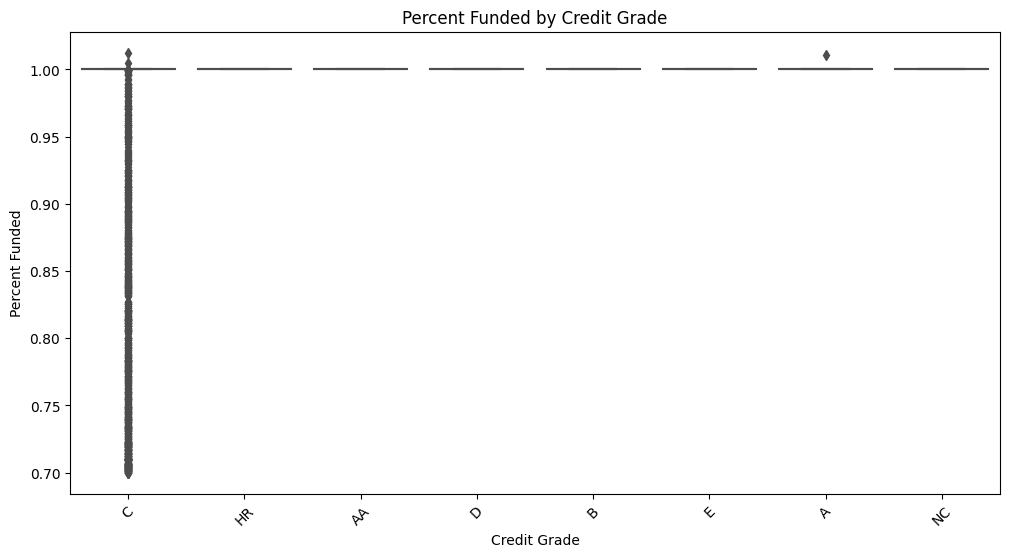

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='CreditGrade', y='PercentFunded', data=df, palette='rainbow')
plt.title('Percent Funded by Credit Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Percent Funded')
plt.xticks(rotation=45)
plt.show()

### A: Observation:  CreditGrades"C" tend to receive more funding than other CreditGrades, potentially indicating lender preferences or trust levels associated with different grades.

### Q : Does the Term of a listing correlate with the number of Investors?

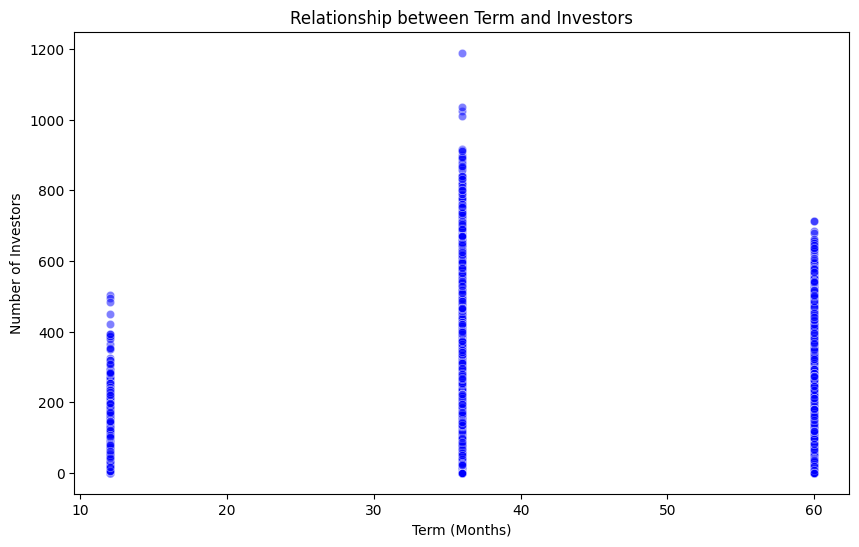

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Term', y='Investors', data=df, color='blue', alpha=0.5)
plt.title('Relationship between Term and Investors')
plt.xlabel('Term (Months)')
plt.ylabel('Number of Investors')
plt.show()

### A: there is a relationship between the term of the listing(Months) and the number of investors. we can see a positive trend in Term (36,37) which would indicate that longer terms are associated with more investors.

 ### Q: Is there a relationship between Recommendations and PercentFunded?

/tmp/ipykernel_33/1429380578.py:6: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(0, df['Recommendations'].quantile(0.95))  # Limiting to 95th percentile for clarity


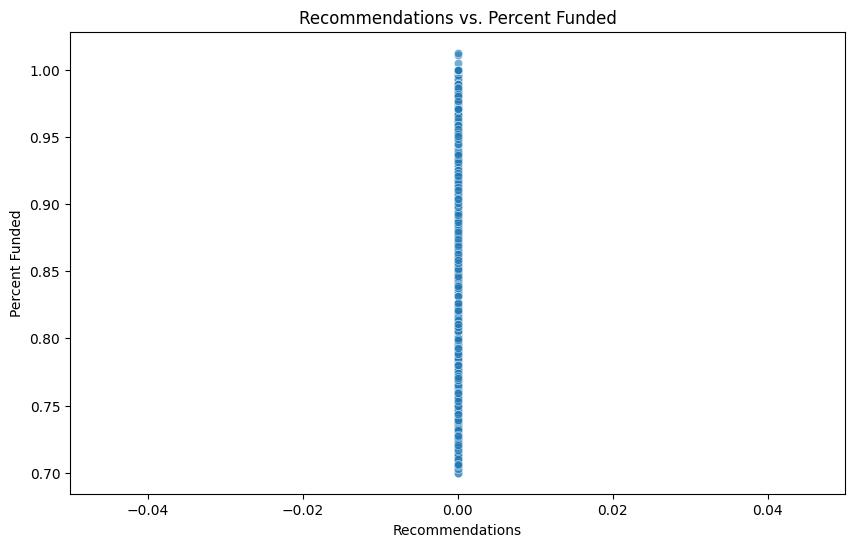

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recommendations', y='PercentFunded', data=df, alpha=0.6)
plt.title('Recommendations vs. Percent Funded')
plt.xlabel('Recommendations')
plt.ylabel('Percent Funded')
plt.xlim(0, df['Recommendations'].quantile(0.95))  # Limiting to 95th percentile for clarity
plt.show()

### A: it can be observed that listings with more recommendations tend to receive higher funding percentages.

### Q:  What is the relationship between InvestmentFromFriendsAmount and InvestmentFromFriendsCount?

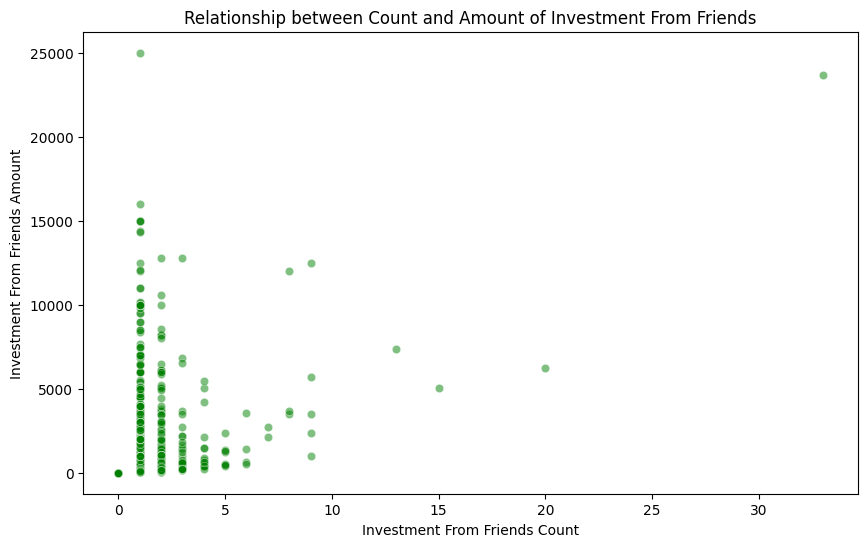

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='InvestmentFromFriendsCount', y='InvestmentFromFriendsAmount', data=df, color='green', alpha=0.5)
plt.title('Relationship between Count and Amount of Investment From Friends')
plt.xlabel('Investment From Friends Count')
plt.ylabel('Investment From Friends Amount')
plt.show()

### A: majority are group of friends "2,3,4 people" investing together, investing correlates with a higher total investment amount, which indicate collective confidence or support levels. 

### Q:what is the impact of Recommendations on Funding Success

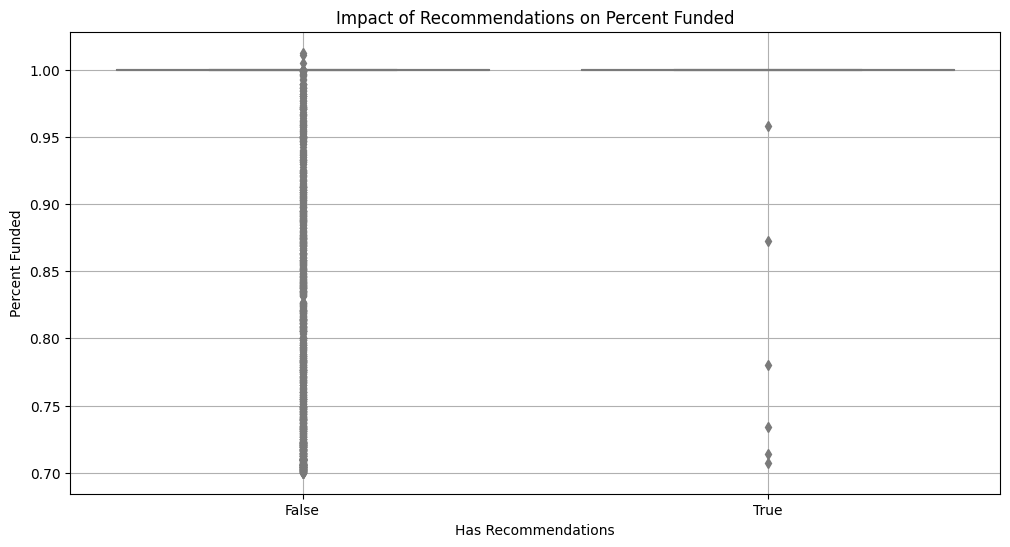

In [60]:
df['HasRecommendations'] = df['Recommendations'] > 0
plt.figure(figsize=(12, 6))
sns.boxplot(x='HasRecommendations', y='PercentFunded', data=df, palette='Pastel1')
plt.title('Impact of Recommendations on Percent Funded')
plt.xlabel('Has Recommendations')
plt.ylabel('Percent Funded')
plt.grid(True)
plt.show()


### A: no positive impact because recommendations don't serve as a trust signal that leads to higher funding rates,and doesn't emphasize the social proof in financing.

### Q:How does the term length of a loan relate to the credit grade in terms of the average percent funded for each combination?

/tmp/ipykernel_33/942242390.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='PercentFunded', index='TermCategory', columns='CreditGrade', aggfunc='mean')


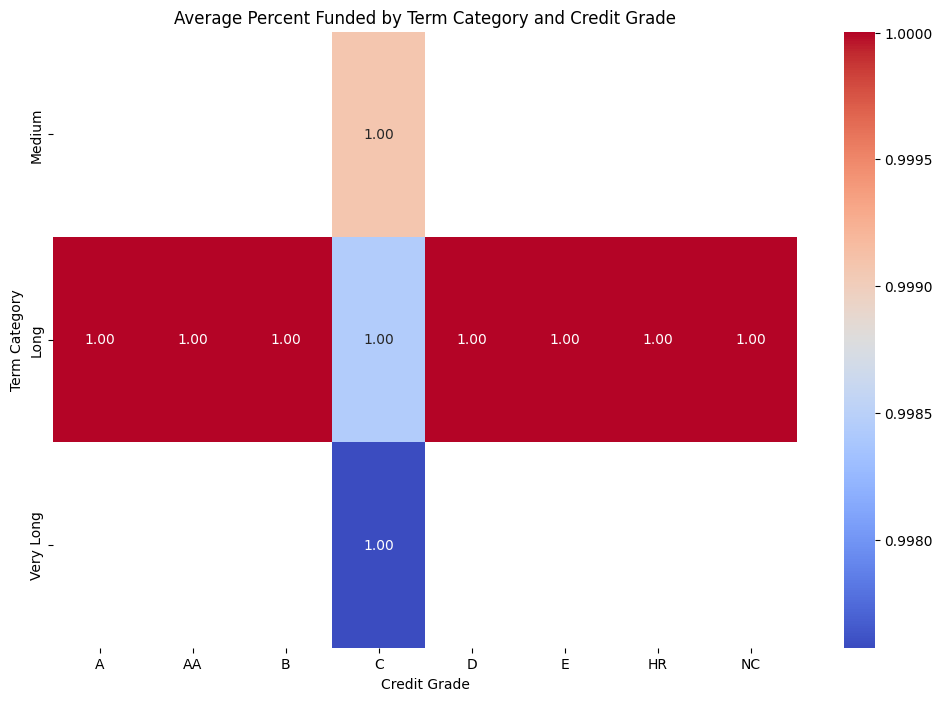

In [64]:
df['TermCategory'] = pd.cut(df['Term'], bins=[0, 12, 36, 60, np.inf], labels=['Short', 'Medium', 'Long', 'Very Long'], right=False)

# Calculate the average percent funded for each combination of TermCategory and CreditGrade
pivot_table = df.pivot_table(values='PercentFunded', index='TermCategory', columns='CreditGrade', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Percent Funded by Term Category and Credit Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Term Category')
plt.show()

### A: the heatmap shows that long-term loans with high credit grades "C" achieve the highest average percent funded, suggesting that investors are more willing to commit to longer terms when the perceived risk is lower. Conversely, short-term loans in lower credit grades "other than C" might show lower average percent funding, indicating hesitancy from investors due to higher perceived risk in shorter recovery times.

## Multivariate Exploration:
allows for the analysis of relationships between three or more variables in a dataset.
* Facet Plot - required
* Plot Matrix
* Scatterplot with multiple encodings

### Q: How does the relationship between the number of investors and the percent funded vary across different CreditGrades and loan terms?

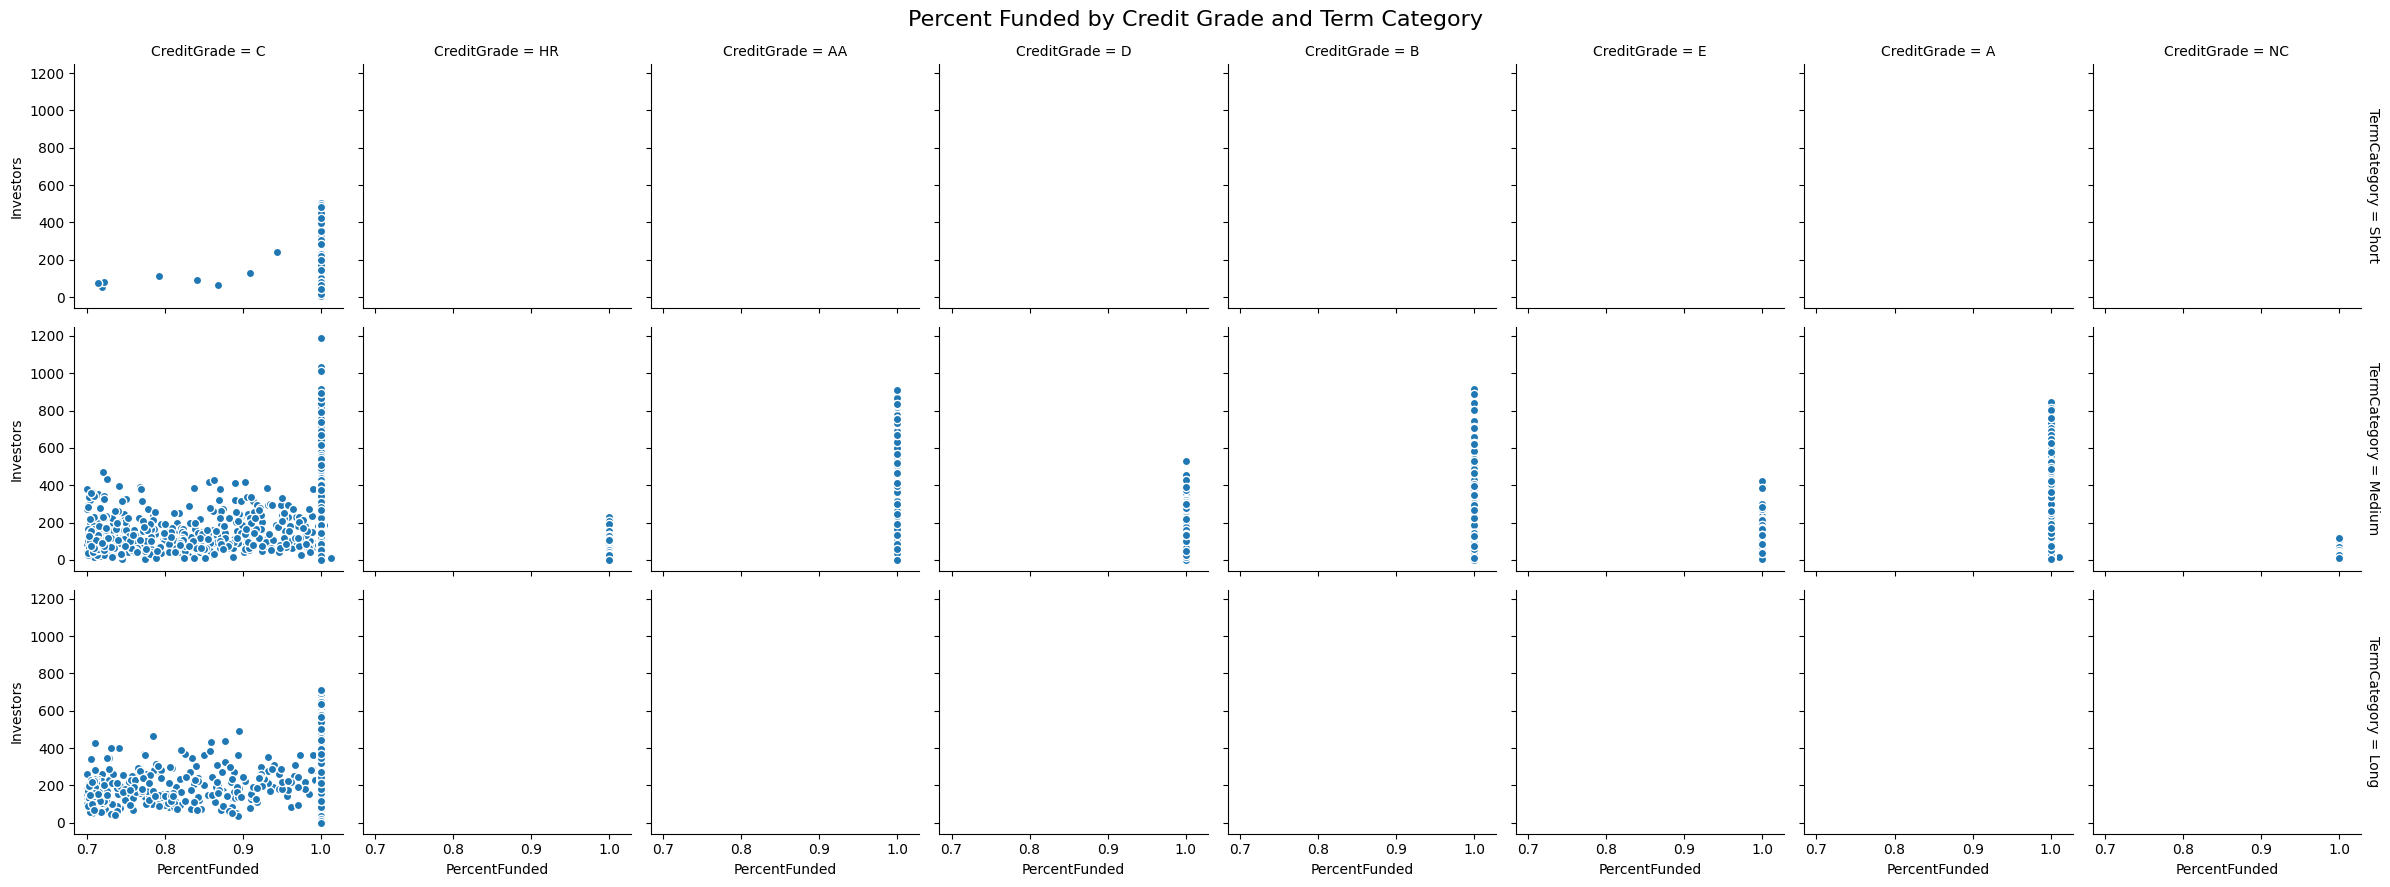

In [61]:
# Assuming 'Term' is categorized for simplicity
df['TermCategory'] = pd.cut(df['Term'], bins=[0, 12, 36, 60], labels=['Short', 'Medium', 'Long'])

g = sns.FacetGrid(df, col="CreditGrade", row="TermCategory", margin_titles=True)
g.map(plt.scatter, "PercentFunded", "Investors", edgecolor="w")
g.fig.suptitle('Percent Funded by Credit Grade and Term Category', fontsize=16)
g.fig.subplots_adjust(top=0.92)

### A:higher CreditGrades and longer terms tend to attract more investors and achieve closer to 100% funding

### Q: What is the relationship among percent funded, number of investors, and recommendations for listings?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


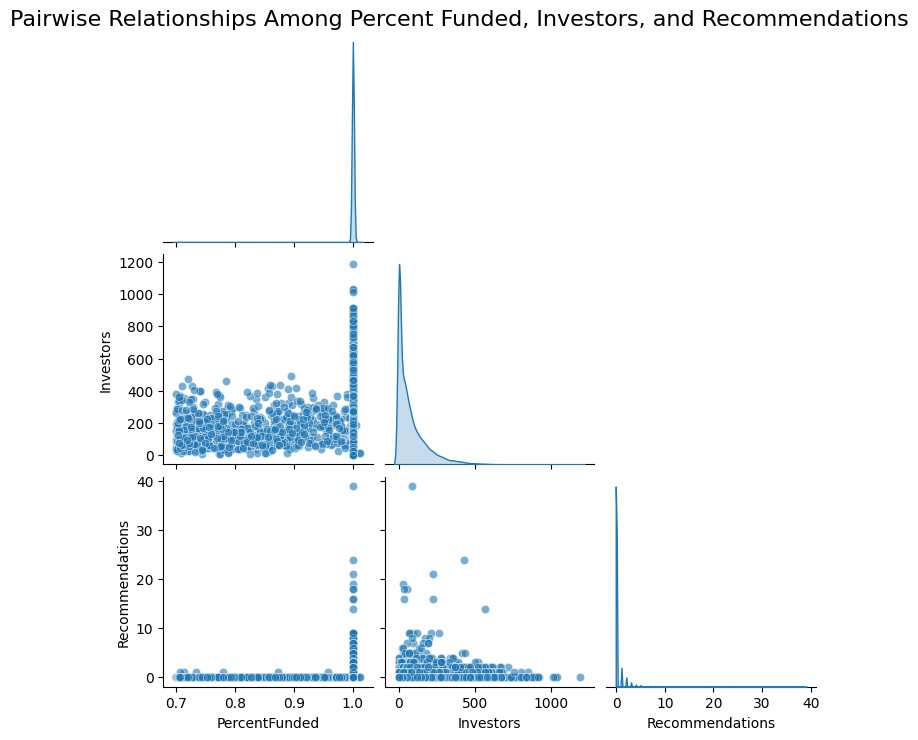

In [62]:
sns.pairplot(df[['PercentFunded', 'Investors', 'Recommendations']], diag_kind='kde', plot_kws={'alpha':0.6}, corner=True)
plt.suptitle('Pairwise Relationships Among Percent Funded, Investors, and Recommendations', fontsize=16)
plt.subplots_adjust(top=0.95)

### A: Listings that are more fully funded have a higher number of investors and more recommendations, which indicate a positive correlation among the mentioned variables

### Q:  Does the credit grade and term of a listing influence its funding success, as measured by the percent funded and the number of investors attracted?

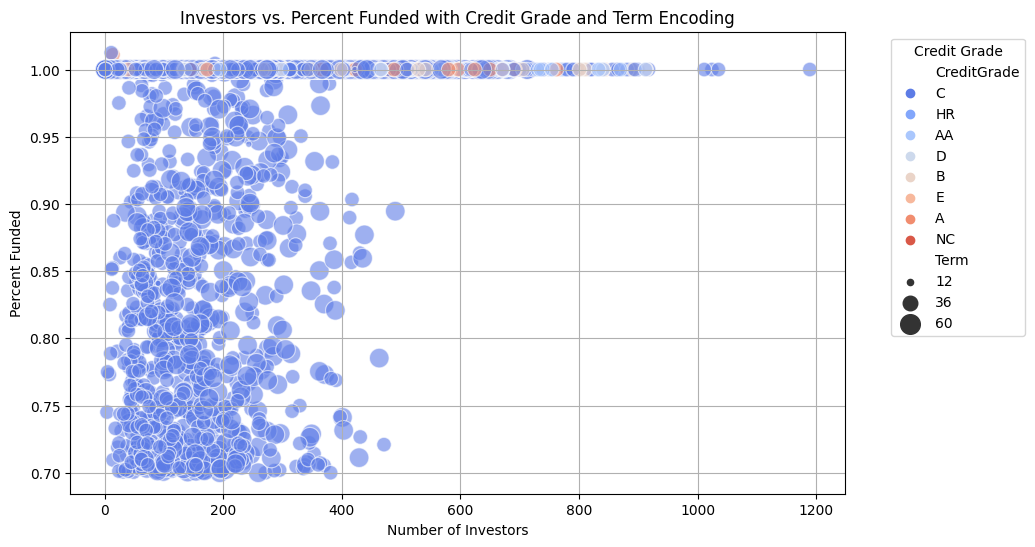

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Investors', y='PercentFunded', hue='CreditGrade', size='Term', alpha=0.6, palette='coolwarm', sizes=(20, 200))
plt.title('Investors vs. Percent Funded with Credit Grade and Term Encoding')
plt.xlabel('Number of Investors')
plt.ylabel('Percent Funded')
plt.legend(title='Credit Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

### A: Listings with higher credit grades and longer terms attract more investors and achieves a higher percent funded, demonstrating the combined effect of creditworthiness and loan term on funding success.

# Questions & Answers
-------------------------
## Univariate Exploration
### Q: Are the creditGrades distributed equally? if not what do you Observe
### A: i can tell from the visualization that CreditGrades are not equally distributed yet i can see a nvery noticeable bias towards a certain class  ,where CreditGrade C is the highest amongst other CreditGrades


### Q: what is the most percent of funding?
### A: funding percentage reached 100% with a high number of benefeciaries


### Q: Can you drive any observation about the Investors? If so what is it?
### A: I can tell that the number of Investors in the range (0, 25) reached the highest frequency up to more than 40000


------------------------
## Birvariate Exploration

### Q: How does CreditGrade affect the PercentFunded?
### A: Observation:  CreditGrades"C" tend to receive more funding than other CreditGrades, potentially indicating lender preferences or trust levels associated with different grades.


### Q : Does the Term of a listing correlate with the number of Investors?
### A: there is a relationship between the term of the listing(Months) and the number of investors. we can see a positive trend in Term (36,37) which would indicate that longer terms are associated with more investors.


 ### Q: Is there a relationship between Recommendations and PercentFunded?
### A: it can be observed that listings with more recommendations tend to receive higher funding percentages.


### Q:  What is the relationship between InvestmentFromFriendsAmount and InvestmentFromFriendsCount?
### A: majority are group of friends "2,3,4 people" investing together, investing correlates with a higher total investment amount, which indicate collective confidence or support levels. 


### Q:what is the impact of Recommendations on Funding Success
### A: no positive impact because recommendations don't serve as a trust signal that leads to higher funding rates,and doesn't emphasize the social proof in financing.



### Q:How does the term length of a loan relate to the credit grade in terms of the average percent funded for each combination?
### A: the heatmap shows that long-term loans with high credit grades "C" achieve the highest average percent funded, suggesting that investors are more willing to commit to longer terms when the perceived risk is lower. Conversely, short-term loans in lower credit grades "other than C" might show lower average percent funding, indicating hesitancy from investors due to higher perceived risk in shorter recovery times.
------------------------------
## Multivariate Exploration


### Q: How does the relationship between the number of investors and the percent funded vary across different CreditGrades and loan terms?
### A:higher CreditGrades and longer terms tend to attract more investors and achieve closer to 100% funding



### Q: What is the relationship among percent funded, number of investors, and recommendations for listings?
### A: Listings that are more fully funded have a higher number of investors and more recommendations, which indicate a positive correlation among the mentioned variables



### Q:  Does the credit grade and term of a listing influence its funding success, as measured by the percent funded and the number of investors attracted?
### A: Listings with higher credit grades and longer terms attract more investors and achieves a higher percent funded, demonstrating the combined effect of creditworthiness and loan term on funding success.




### Thank You"THE END"